### 숙명여대 학과 정보 수집

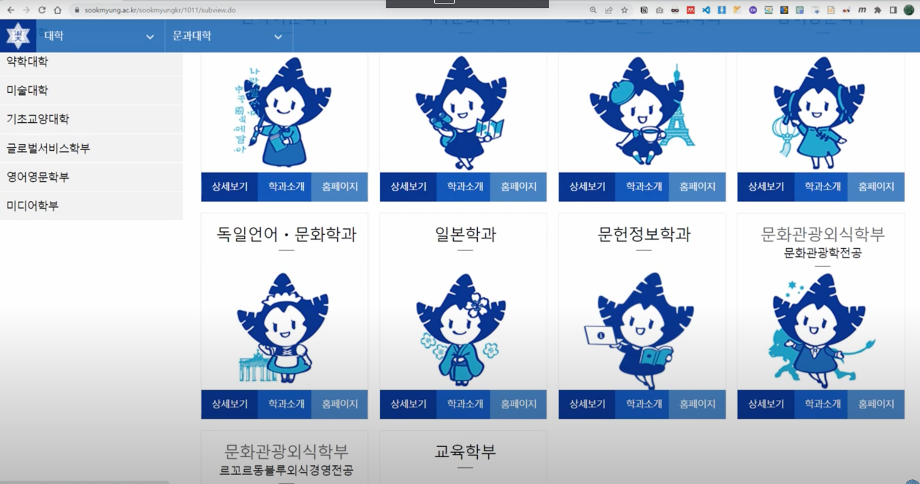

In [4]:
from IPython.display import display, Image
display(Image('image01_sookmyung.png'))

In [1]:
# 필요한 모듈 참조
import requests
    # request로 갖고 온 데이터값이 JSON형태이면 dictionary로 변환하면 된다
    # request로 갖고 온 데이터값이 HTML + CSS 이면 BeautifulSoup라는 클래스를 통해 HTML + CSS 안에 있는 내용들을 추출해준다
from bs4 import BeautifulSoup
from pandas import DataFrame

In [2]:
# 수집할 컨텐츠가 있는 웹 페이지의 주소
url = "https://www.sookmyung.ac.kr/sookmyungkr/1011/subview.do"

In [3]:
# 접속개체 생성
session = requests.Session()

# 접속객체에 부가정보 (header) 삽입하기
session.headers.update({
    "Referer": "",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36"
})

# 생성한 접속객체를 활용하여 API에 접속
r = session.get(url)

# 접속에 실패한 경우
if r.status_code != 200:
    # 에러코드와 에러메시지 출력
    msg = "[%d Error] %s 에러가 발생함" % (r.status_code, r.reason)
    # 에러를 강제로 생성시킴
    raise Exception (msg)

r.encoding = "utf-8"
soup = BeautifulSoup(r.text)
soup

<!DOCTYPE html>
<html class="no-js" lang="ko">
<head>
<title>한국어문학부 | 숙명여자대학교(국문)</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0,user-scalable=yes" name="viewport"/>
<link href="data:;base64,iVBORw0KGgo=" rel="icon"/>
<link href="/_res/sookmyung/_share/img/common/favicon-32x32.png" rel="icon" sizes="16x16" type="image/png"/>
<meta content="website" property="og:type"/>
<meta content="ko" property="og:locale"/>
<meta content="숙명여자대학교(국문)" property="og:site_name"/>
<meta content="2023-12-19T11:43:15Z" property="og:updated_time"/>
<meta content="summary" name="twitter:card"/>
<link href="http://sookmyung.ac.kr/kr/university-graduate/liberal-arts01.do" rel="canonical"/>
<link defer="" href="/_res/_common/css/cms.css" rel="stylesheet" type="text/css"/>
<link defer="" href="/_res/sookmyung/_share/css/swiper.min.css?47991"

#### 응답결과로부터 데이터 추출하기

In [8]:
# 수집한 정보를 저장할 빈 리스트
학과목록_리스트 = []

college_list = soup.select(".college_list")
# print (college_list)

for item in college_list:
    # print(item)
    # print("-" * 50)

    # 학과 이름
    h5El = item.select("h5")
    name = h5El[0].text.strip()
    name
    
    # 상세보기 url
    # 가져온 페이지 주소의 예) /sookmyungkr/1012/subview/do
    # 같은 사이트 안에서 이동할 때는 앞부분 "https://www.sookmyung.ac.kr"을 생략 가능하나
    # 외부에서 직접 접근할 때는 반드시 전체 주소가 필요함
    # 가져온 값이 전체주소가 아니므로 검사하여 누락된 부분을 덧붙여야 한다
    viewEl = item.select(".view")
    view = viewEl[0].attrs["href"]

    if view.find("https://www.sookmyung.ac.kr") == -1:
        view = "https://www.sookmyung.ac.kr" + view
        # print(view)
        # print("-" * 50)
    
        # 학과 소개 pdf 
        infoEl = soup.select(".info")
        info = infoEl[0].attrs['href']
        # print(info)
        # print("-" * 50)

        # 학과 홈페이지
        homepageEl = soup.select(".homepage")
        homepage = homepageEl[0].attrs['href']
        # print(homepage)
        # print("-" * 50)

        # 수집한 값들을 딕셔너리로 묶은 후 리스트에 추가
        college_dict = {'학과이름': name, '상세페이지': view, '홈페이지': homepage}
        학과목록_리스트.append(college_dict)

df = DataFrame(학과목록_리스트, )
df.index += 1 # index를 1부터 시작하기
df.to_excel('3_학과정보수집1.xlsx')
df

[<div class="content-wrap cms-print">
<div class="title" data-cms-content="/kr/_content/title-3-deps">
<div class="page-title">
<h3>
    
      
      
      
      
      
      
    
문과대학
  </h3>
</div>
</div>
<div class="sub-content01 cms-sub-content" data-cms-sub-content="vDQNjWYaxyHg">
<!--
<div class="content-box"><div class="con-box02"><p class="slo-p">학문의 기초를 탐구하는 창의적인 인재를 양성합니다.</p><p class="con-p">문과대학은 1948년 국문학과를 모태로 하여 현재 4개 학부, 5개 학과로 체계를 갖추고 있습니다.</p><p class="con-p">학문의 기초인 인문학을 탐구하며 학문 발전의 중추적 역할을 하고 있는 문과대학은, 다각적인 인문학적 방법론을 통해 통찰력 있고 창의적인 인재를 양성하고 있습니다.</p><p class="con-p">어학, 문학, 역사, 문화, 교육 등을 통해 삶의 의미와 가치를 탐구하는 인문 능력을 함양하고, 기초학문의 발전을 주도해 나갈 세계적인 인재를 양성합니다.</p><p class="con-p no-pd">이를 위해 논리적 정보와 문화적 감성을 바탕으로 고전부터 현대에 이르는 동서양의 역사와 문화에 대한 창조적인 지식을 쌓고, 다문화 다변화 사회가 요구하는 새로운 비전을 제시하는 여성 인재로서 글로벌시대에 적합한 미래지향적인 소양을 쌓도록 지도합니다.</p></div><div class="con-box"><h4 class="h4-tit01">교육목표</h4><div class="con-indent-box"><div class="bg-box"><ol class="ol-type01"><li>학문의 기초가 되는 인문과학